In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

print("Unsupervised Learning notebook started...")

Unsupervised Learning notebook started...


In [2]:
file_path = '../data/healthcare_dataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")

Dataset loaded successfully.


In [3]:
billing_data = df[['Billing Amount']]
print("\n--- Analyzing 'Billing Amount' for Anomalies ---")


--- Analyzing 'Billing Amount' for Anomalies ---


In [4]:
model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)

In [5]:
model.fit(billing_data)

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [6]:
df['Anomaly_Score'] = model.decision_function(billing_data) # How anomalous it is
df['Anomaly'] = model.predict(billing_data)

In [7]:
df['Anomaly_Status'] = df['Anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
print(f"Total anomalies detected: {len(df[df['Anomaly'] == -1])}")

Total anomalies detected: 1110



--- Visualizing Anomalies ---


C:\Users\nithi\AppData\Local\Temp\ipykernel_15772\4106448562.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df['Billing Amount'], y=df['Anomaly_Status'],


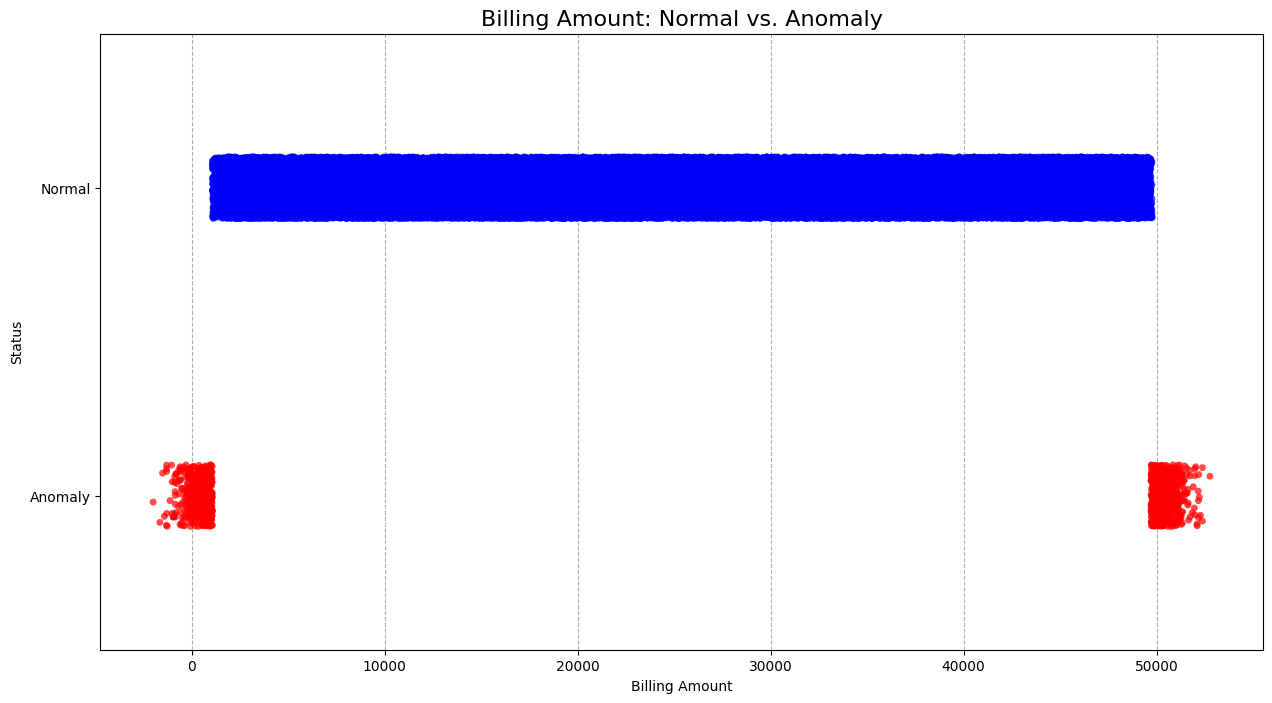

In [8]:
print("\n--- Visualizing Anomalies ---")
# We'll use a stripplot to see the individual points clearly
plt.figure(figsize=(15, 8))
sns.stripplot(x=df['Billing Amount'], y=df['Anomaly_Status'], 
              palette={'Normal':'blue', 'Anomaly':'red'}, jitter=0.1, alpha=0.7)
plt.title('Billing Amount: Normal vs. Anomaly', fontsize=16)
plt.xlabel('Billing Amount')
plt.ylabel('Status')
plt.grid(True, axis='x', linestyle='--')
plt.show()

In [10]:
print("\n--- Detected Anomalies for Review (Top 20) ---")
# Select relevant columns for review
anomalies_df = df[df['Anomaly_Status'] == 'Anomaly'][[
    'Name', 'Age', 'Medical Condition', 'Billing Amount', 'Anomaly_Score'
]]

# Sort by the score to see the "most anomalous" first (most negative score)
print(anomalies_df.sort_values(by='Anomaly_Score').head(20))

print("\n--- Task 3.4: Interpretation ---")
print("The 'Anomaly' status has been marked for review in the DataFrame.")
print("The visualization and the table above highlight the detected anomalies.")
print("\nThese data points represent billing amounts that are significantly different")
print("from the typical range. In this dataset, the anomalies appear to be on")
print("the *low* end of the billing spectrum (some are even negative), which")
print("could indicate data entry errors, special discounts, or other unusual cases.")
print("Any entries on the very high end would also be flagged if they deviated")
print("significantly from the main cluster of data.")


print("\nUnsupervised Learning Task 3 Complete.")


--- Detected Anomalies for Review (Top 20) ---
                           Name  Age Medical Condition  Billing Amount  \
48659               EMMA savAGE   57      Hypertension    -1660.009373   
47589                james lUnA   64            Cancer    -2008.492140   
42621                 joHn hahN   80            Asthma    -1520.420555   
38123             CaLVIN cAmpOS   26            Cancer    -1277.645337   
44040            JOsEPH robBins   71      Hypertension    -1428.843941   
45423               BRian jOnes   85         Arthritis    -1129.997176   
29484              tErRy WILSOn   39          Diabetes    -1316.618581   
43009                JoHN MoOre   65            Asthma    -1306.662189   
52213  mr. ChRIStOPhER aLvARaDO   74           Obesity    -1310.272895   
50099              tErRy WILSOn   43          Diabetes    -1316.618581   
3772   mr. ChRIStOPhER aLvARaDO   77           Obesity    -1310.272895   
39300            joSEPH StEveNs   75           Obesity     -967.